# Assignment 3: Support Vector Machines

## By: Chuwkwuma Ejieh

#### This explains the python code I used to implement the questions for assignment 3 and serves as a report

 The first step was to import all the libraries I need to implement all the tasks stated in the assignment. Pandas is used to handle the data files (CSV file), sklearn is the library that handles the SVM classifier and evaluation metrics, numpy is used for some matrix mathematical operations and matplotlib is used to plot.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

### The ClusterinCluster Dataset

In [3]:
path_one = 'C:\\Users\\Chux\\Desktop\\Datasets for Pattern Recognition\\clusterincluster.csv' #path of the csv file

This function takes in the system path of were the data file is formed and transforms it to an array. It returns the features of the dataset, the classes and the length of the dataset

In [4]:
def load_data(path):
    ''' Takes in path of CSV file and returns the features, classes and length of data'''
    #d_features, d_classes, d_length
    data = pd.read_csv(path, header=None)
    d_features = data.ix[:,0:1]
    d_classes = data.ix[:,2:2]
    d_length = len(data)
    
    return (d_features.values, d_classes.values, d_length)

In [5]:
data_one = load_data(path_one)

This function implements the k-fold cross-validation. It takes as input the length of the data (i.e. the number of instances in the data) and the number of folds.

In [6]:
def k_fold(length, n_folds):
    '''Splits the data into the number of folds given as input'''
    return KFold(length, n_folds)

In [7]:
kfold_one = k_fold(1000, 10)

The function below gets the metrics used for evaluation. It takes in the predicted classes and the real classes as inputs and outputs 5 evaluation metrics - PPV, NPV, Specificity, Sensitivity, Accuracy. TP means True Positive; TN, True Negative; FP, False Positive; FN, False Negative. Class one is taken as Positive and Class two as Negative.

In [8]:
def get_metrics (predicted, real):
    TP, TN, FP, FN = 0,0,0,0
    n = len(predicted) #len of the test set
    P = len([x for x in real if x==1])#Class one is taken as Positive
    N = len([x for x in real if x==2])#Class two is taken as Negative
       
    for i,j in zip(predicted, real):
        if i == 1 and j == 1:#if the predicted class is 1 and the real class is 1, increase the count of True Positive
            TP +=1
        elif i == 1 and j==2:#if the predicted class is 1 and the real class is 2, increase the count of False Positive
            FP +=1
        elif i==2 and j==2:#if the predicted class is 2 and the real class is 2, increase the count of True Negative
            TN +=1
        elif i==2 and j==1:#if the predicted class is 2 and the real class is 1, increase the count of False Negative
            FN +=1
        else:
            pass
    if (TP+FP) == 0:
        PPV= 0
    else:
        PPV = TP/float(TP+FP) #PPV is the total TPs divided by the sum of total TPs and NPs. Float is used to avoid rounding up to integers.
        
    if (TN+FN) == 0:
        NPV = 0
    else:
        NPV = TN/float(TN+FN) #NPV is the total TNs divided by the sum of total TNs and FNs
        
    if (TN+FP) == 0:
        Specificity =  0
    else:
        Specificity = TN/float(TN+FP) # Specificity is the total TNs divided by the sum of TNs and FPs
        
    if (TP+FN)==0:
        Sensitivity= 0
    else:
        Sensitivity = TP/float(TP+FN) # Sensitivity is the total TPs divided by the sum of TPs and FNs
        
    if (TP+TN)==0:
        Accuracy = 0
    else:
        Accuracy = float(TP+TN)/n # Accuracy is the sum of the TPs and TNs divided by the length of the test set.
        
    return (PPV, NPV, Specificity, Sensitivity, Accuracy)

Below is the initialization of the SVM classifiers with 3 different Kernels (linear, polynomial and rbf)

In [9]:
linear_svm, poly_svm, rbf_svm = SVC(kernel='linear'), SVC(kernel='poly', degree=3), SVC(kernel='rbf')

This function does the actual classification. It takes in the data attributes, classes, k_fold method and the kernel type to be used for classification. Met1-5 corresponds to the 5 metrics used to evaluate the classifier. The first step in the fucntion is to use the k_fold method to split into train and test data, it then fits the data into the SVM classifier with the required kernel type and predicts the class of the test data. The 5 metrics are printed at the end.

In [10]:
def classify_svm (data_attributes, data_classes, k_fold, svm_type):
    met1, met2, met3, met4, met5 = 0.0,0.0,0.0,0.0,0.0
    for train, test in k_fold:
    
        train_data, train_class = data_attributes[train], data_classes[train]
        test_data, test_class = data_attributes[test], data_classes[test]
        svm_type.fit(train_data, np.ravel(train_class))
        pred_labels =svm_type.predict(test_data)
        metrics = get_metrics (pred_labels,test_class)
        met1 = met1+metrics[0] 
        met2 = met2+metrics[1]
        met3 =  met3+metrics[2]
        met4 = met4 +metrics[3]
        met5 = met5+metrics[4]
    print ('Average PPV: {0:.4f}'.format(met1/10))   
    print ('Average NPV: {0:.4f}'.format(met2/10)) 
    print ('Average Specificity: {0:.4f}'.format(met3/10)) 
    print ('Average Sensitivity: {0:.4f}'.format(met4/10)) 
    print ('Average Accuracy: {0:.4f}'.format(met5/10)) 
    return None

###### Running the SVM linear kernel

In [11]:
classify_svm (data_one[0], data_one[1], kfold_one, linear_svm)

Average PPV: 0.0000
Average NPV: 0.0000
Average Specificity: 0.0000
Average Sensitivity: 0.0000
Average Accuracy: 0.0000


##### Running the SVM polynomial kernel (degree 3)

In [12]:
classify_svm (data_one[0], data_one[1], kfold_one, poly_svm)

Average PPV: 0.0000
Average NPV: 0.5000
Average Specificity: 0.0730
Average Sensitivity: 0.0000
Average Accuracy: 0.0730


##### Running the SVM rbf kernel

In [13]:
classify_svm (data_one[0], data_one[1], kfold_one, rbf_svm)

Average PPV: 0.5000
Average NPV: 0.5000
Average Specificity: 0.5000
Average Sensitivity: 0.5000
Average Accuracy: 1.0000


#### Discussion

From the results above, we can see that the linear kernel got a 0% accuracy and the rbf kernel got a 100% accuracy. The Polynomial kernel (degree 3) got an accuracy of 7.3% which is still very low. This shows that for this dataset (clusterincluster), the rbf kernel perfoms very well.

In the next section, I will oprimize the classifier using grid search.

In [14]:
linear_tuned_parameters, poly_tuned_parameters, rbf_tuned_parameters = [{'kernel': ['linear']}],\
    [{'kernel': ['poly']}],[{'kernel': ['rbf']}]


This inititializes the classifiers and tunes them with the parameters defined above. "cv" means cross-validation and it is set to 10.

In [15]:
tuned_rbf = GridSearchCV(SVC(C=1), rbf_tuned_parameters, cv=10)
tuned_linear = GridSearchCV(SVC(C=1), linear_tuned_parameters, cv=10)
tuned_poly = GridSearchCV(SVC(C=1), poly_tuned_parameters, cv=10)

This function does the classification using the tuned parameters of the grid search. It splits the data into training and test data and fits it using the tuned paramenters. It should be noted that the data was not normalized.

In [16]:
def grid_classify (features, classes, grid_classifier):
    train_data, test_data, train_class, test_class = train_test_split(
    features, classes, test_size=0.1, random_state=0)
    grid_classifier.fit(train_data, np.ravel(train_class))
    pred_labels =grid_classifier.predict(test_data)
    metrics = (get_metrics(pred_labels, test_class))
    print ('Average PPV: {0:.4f}'.format(metrics[0]))   
    print ('Average NPV: {0:.4f}'.format(metrics[1])) 
    print ('Average Specificity: {0:.4f}'.format(metrics[2])) 
    print ('Average Sensitivity: {0:.4f}'.format(metrics[3])) 
    print ('Average Accuracy: {0:.4f}'.format(metrics[4]))
    
    return (pred_labels, np.ravel(test_class))

##### Tuned Linear Kernel

In [17]:
grid_linear =grid_classify(data_one[0], data_one[1], tuned_linear)

Average PPV: 0.5278
Average NPV: 0.5000
Average Specificity: 0.2917
Average Sensitivity: 0.7308
Average Accuracy: 0.5200


This function gets the True Positive rate and False Positive Rates and plots it to get the ROC curve. When called, it displays the ROC curve and outputs the AUC score.

In [18]:
def roc_metrics(pred_data, real_data):
    TP,FP = 0.0,0.0
    P = len([x for x in real_data if x==1])#Class one is taken as Positive
    N = len([x for x in real_data if x==2])#Class two is taken as Negative
    TP_rate = []
    FP_rate =[]
    for i,j in zip(pred_data, real_data):
        if i == 1 and j == 1:#if the predicted class is 1 and the real class is 1, increase the count of True Positive
            TP +=1
        elif i == 1 and j==2:#if the predicted class is 1 and the real class is 2, increase the count of False Positive
            FP +=1
        else:
            pass
        TP_rate.append(TP/P)
        FP_rate.append(FP/N)
    plt.plot(FP_rate, TP_rate)
    plt.axis([0,1,0,1])
    plt.xlabel ("False Positive Rate")
    plt.ylabel ("True Positive Rate")
    plt.show()
    AUC = auc(FP_rate, TP_rate)
    return (AUC)

Calling the function to display the roc curve on the optimized classifier with the linear kernel.

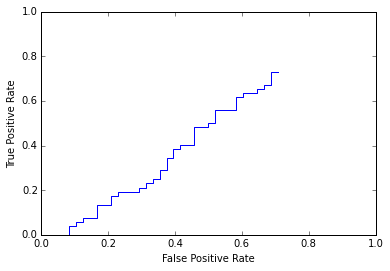

0.22636217948717954

In [19]:
roc_metrics(grid_linear[0], grid_linear[1])

##### Tuned Polynomial Model

In [20]:
grid_poly =grid_classify(data_one[0], data_one[1], tuned_poly)

Average PPV: 0.5417
Average NPV: 1.0000
Average Specificity: 0.0833
Average Sensitivity: 1.0000
Average Accuracy: 0.5600


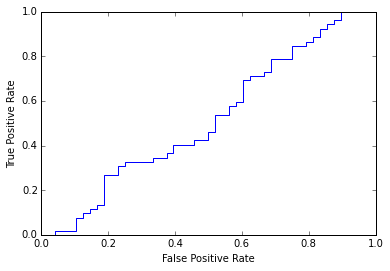

0.43629807692307687

In [21]:
roc_metrics(grid_poly[0], grid_poly[1])

##### Tuned RBF Kernel

In [22]:
grid_rbf =grid_classify(data_one[0], data_one[1], tuned_rbf)

Average PPV: 1.0000
Average NPV: 1.0000
Average Specificity: 1.0000
Average Sensitivity: 1.0000
Average Accuracy: 1.0000


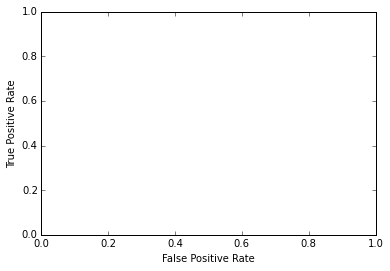

0.0

In [23]:
roc_metrics(grid_rbf[0], grid_rbf[1])

#### Discussion


Using Grid Search to tune, there was a vast jump in performace in both the linear (from 0% to 52%) and polynomial kernels (from 7.2% to 56%). The RBF kernel still had a perfect score. The ROC curve of the RBF kernel is not showing anyline because the line is on the y-axis since is has a perfect classification. And since it is a line not a curve (False Positive Rate is zero), the Area under curve (AUC) is zero.

### The Half Kernel Dataset

I will use the functions defined earlier when classifying this data set. The first step is to load the data.

In [24]:
path_two = 'C:\\Users\\Chux\\Desktop\\Datasets for Pattern Recognition\\halfkernel.csv'

In [25]:
data_two = load_data(path_two)

In [26]:
kfold_two = k_fold(1000,10)

##### Running the SVM Linear Kernel

In [27]:
classify_svm (data_two[0], data_two[1], kfold_two, linear_svm)

Average PPV: 0.5000
Average NPV: 0.5000
Average Specificity: 0.2840
Average Sensitivity: 0.3610
Average Accuracy: 0.6450


##### Running the SVM Polynomial Kernel

In [ ]:
classify_svm (data_two[0], data_two[1], kfold_two, poly_svm)

##### Running the SVM RBF Kernel

In [28]:
classify_svm (data_two[0], data_two[1], kfold_two, rbf_svm)

Average PPV: 0.5000
Average NPV: 0.5000
Average Specificity: 0.5000
Average Sensitivity: 0.5000
Average Accuracy: 1.0000


#### Discussion

It is seen that SVM performs better in this dataset than the previous one (cluster in cluster dataset). It also gives a perfect classification for the RBF kernel.

Next, we apply gridsearch optimization to get better results

##### Tuned Linear Kernel

In [29]:
grid_linear_two =grid_classify(data_two[0], data_two[1], tuned_linear)

Average PPV: 0.6857
Average NPV: 0.8667
Average Specificity: 0.5417
Average Sensitivity: 0.9231
Average Accuracy: 0.7400


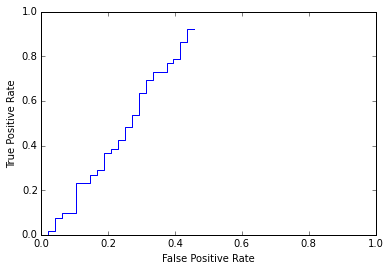

0.20072115384615383

In [30]:
roc_metrics(grid_linear_two[0], grid_linear_two[1])

##### Tuned Polynomial Kernel 

In [ ]:
grid_poly_two =grid_classify(data_two[0], data_two[1], tuned_poly)

In [ ]:
roc_metrics(grid_poly_two[0], grid_poly_two[1])

##### Tuned RBF Kernel

In [31]:
grid_rbf_two =grid_classify(data_two[0], data_two[1], tuned_rbf)

Average PPV: 1.0000
Average NPV: 1.0000
Average Specificity: 1.0000
Average Sensitivity: 1.0000
Average Accuracy: 1.0000


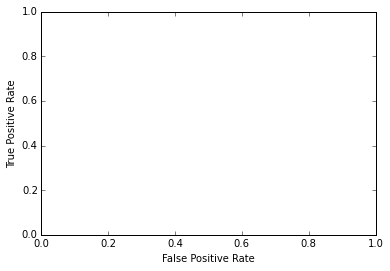

0.0

In [32]:
roc_metrics(grid_rbf_two[0], grid_rbf_two[1])

#### The Two Gaussians Dataset

In [33]:
path_three = 'C:\\Users\\Chux\\Desktop\\Datasets for Pattern Recognition\\twogaussians.csv'

In [34]:
data_three = load_data(path_three)

In [36]:
kfold_three = k_fold(400,10)

##### Running the SVM Linear Kernel

In [37]:
classify_svm (data_three[0], data_three[1], kfold_three, linear_svm)

Average PPV: 0.5857
Average NPV: 0.5000
Average Specificity: 0.4846
Average Sensitivity: 0.5825
Average Accuracy: 0.9675


##### Running the SVM Polynomial Kernel

In [ ]:
classify_svm (data_three[0], data_three[1], kfold_three, poly_svm)

##### Running the SVM RBF Kernel

In [38]:
classify_svm (data_three[0], data_three[1], kfold_three, rbf_svm)

Average PPV: 0.6000
Average NPV: 0.5000
Average Specificity: 0.4900
Average Sensitivity: 0.5850
Average Accuracy: 0.9750


#### Discussion

The linear kernel works very well on this dataset when compared to the last two (cluster in cluster and half kernel). The RBF kernel decreases in accuracy a little bit but still performs well.

Below, gridsearch is applied.

##### Tuned Linear Kernel

In [39]:
grid_linear_three =grid_classify(data_three[0], data_three[1], tuned_linear)

Average PPV: 1.0000
Average NPV: 0.8889
Average Specificity: 1.0000
Average Sensitivity: 0.9167
Average Accuracy: 0.9500


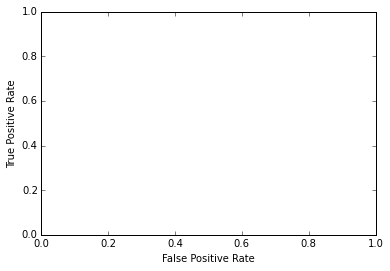

0.0

In [40]:
roc_metrics(grid_linear_three[0], grid_linear_three[1])

##### Tuned Polynomial Kernel

In [ ]:
grid_poly_three =grid_classify(data_three[0], data_three[1], tuned_poly)

In [ ]:
roc_metrics(grid_poly_three[0], grid_poly_three[1])

##### Tuned RBF Kernel

In [41]:
grid_rbf_three =grid_classify(data_three[0], data_three[1], tuned_rbf)

Average PPV: 1.0000
Average NPV: 0.8889
Average Specificity: 1.0000
Average Sensitivity: 0.9167
Average Accuracy: 0.9500


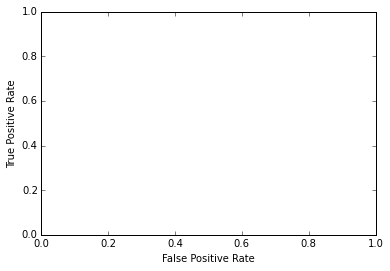

0.0

In [42]:
roc_metrics(grid_rbf_three[0], grid_rbf_three[1])

#### The Two Spirals Dataset

In [43]:
path_four = 'C:\\Users\\Chux\\Desktop\\Datasets for Pattern Recognition\\twospirals.csv'

In [44]:
data_four = load_data(path_four)

In [46]:
kfold_four = k_fold(1000,10)

##### Running the SVM Linear Kernel

In [47]:
classify_svm (data_four[0], data_four[1], kfold_four, linear_svm)

Average PPV: 0.5000
Average NPV: 0.5000
Average Specificity: 0.3010
Average Sensitivity: 0.2780
Average Accuracy: 0.5790


##### Running the SVM Polynomial Kernel

In [ ]:
classify_svm (data_four[0], data_four[1], kfold_four, poly_svm)

##### Running the SVM RBF Kernel

In [48]:
classify_svm (data_four[0], data_four[1], kfold_four, rbf_svm)

Average PPV: 0.5000
Average NPV: 0.5000
Average Specificity: 0.4670
Average Sensitivity: 0.4720
Average Accuracy: 0.9390


##### Tuned Linear Kernel

In [49]:
grid_linear_four =grid_classify(data_four[0], data_four[1], tuned_linear)

Average PPV: 0.6481
Average NPV: 0.6304
Average Specificity: 0.6042
Average Sensitivity: 0.6731
Average Accuracy: 0.6400


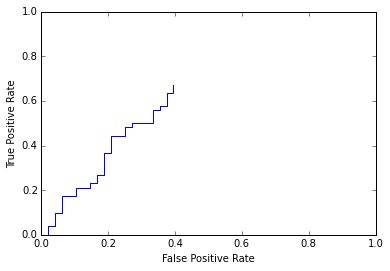

0.13341346153846154

In [50]:
roc_metrics(grid_linear_four[0], grid_linear_four[1])

##### Tuned Polynomial Kernel

In [ ]:
grid_poly_four =grid_classify(data_four[0], data_four[1], tuned_poly)

In [ ]:
roc_metrics(grid_poly_four[0], grid_poly_four[1])

##### Tuned RBF Kernel

In [51]:
grid_rbf_four =grid_classify(data_four[0], data_four[1], tuned_rbf)

Average PPV: 0.9623
Average NPV: 0.9787
Average Specificity: 0.9583
Average Sensitivity: 0.9808
Average Accuracy: 0.9700


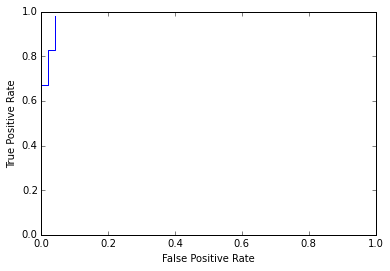

0.03125

In [52]:
roc_metrics(grid_rbf_four[0], grid_rbf_four[1])